In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf

In [6]:
import numpy as np

## loading - "MNIST Data set"
### contains Training samples= 60000, testing sample = 10000
#### tensort flow already contains MNIST data set which can be loaded using keras

In [7]:
mnist = tf.keras.datasets.mnist   ## this is basically handwritten characters based on 28x28 size images of 0 to 9

### after loading MNIST dataset, divide into train and test dataset

In [8]:
## unpacking ths dataset into train and test dataset
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
import matplotlib.pyplot as plt

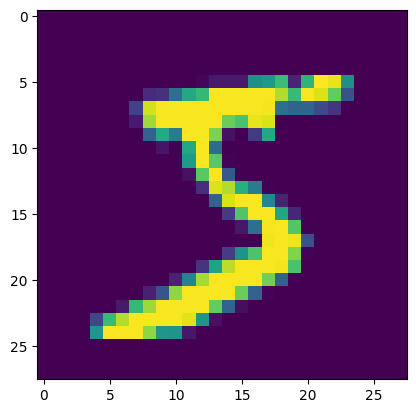

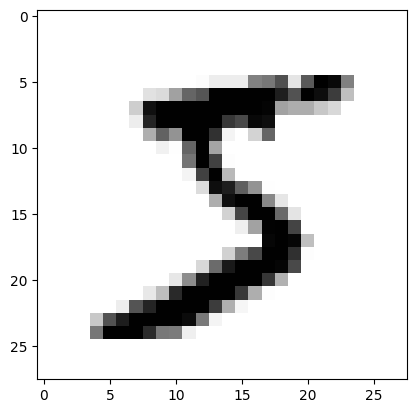

In [11]:
# checking how data look
plt.imshow(x_train[0])
plt.show()
# we ont know whether its coloured or binary images
# so inorder to plot it change the configuration
plt.imshow(x_train[0], cmap = plt.cm.binary)  # changin image to binary format

### checking value of each pixel 
### before Normalization

In [12]:
print(x_train[0]) ### before Normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### as images are in Gray level(i.e form 0 to 255), not coloured(RGB)
### we need to normalize the data as :- Normalization can make the data more interpretable and easier to understand. By putting all features on the same scale, it can be easier to see the relationships between different variables and make meaningful comparisons.
### the goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values
## Normalizing the data | Pre-Processing Step

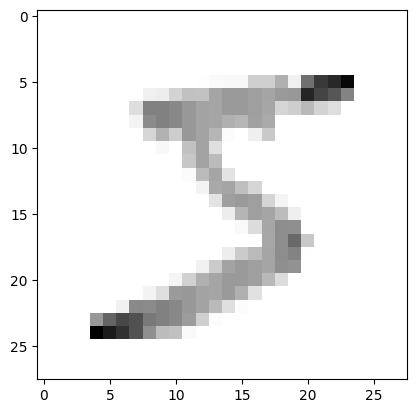

In [13]:
### as its gray image all variable varies from 0 to 255
### in order to narmalize 
x_train= tf.keras.utils.normalize(x_train, axis=1)
x_test= tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

### After Normalization

In [14]:
print(x_train[0])  ## you can see all value are normalized i.e between 0 to 1

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [15]:
### x_train have data and y_train have lables
### to check if we have lable inside our network
print(y_train[0])

5


## Resizing img to make it suitable for apply convolution operation

In [16]:
IMG_SIZE= 28
x_trainr= np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE,1)  ## increasing one dimension for filter / kernel operation
       # max size correspond to -1 i.e -1 here is 60,000
       # you can use 60,000 in place of -1 here but its mor easier and effective to let numpy do the work easily and accurately , so we use -1 to tell the max size of our array
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE,1)  ## increasing one dimension for kernel operation i.e to perform convolution operation
  # need of adding 1 extra channel when we resaped above(ie 1 written in last of reshape())
      #1.:-RGB Images: Have three channels (Red, Green, Blue). An RGB image of size IMG_SIZE x IMG_SIZE would be represented as IMG_SIZE x IMG_SIZE x 3.
       #   By adding a channel dimension to grayscale images, the format becomes consistent with RGB images, making it easier to handle different types of images within the same framework.
      #2. Compatibility with Convolutional Layers:
        # Convolutional neural networks (CNNs) expect the input data to have a specific shape. For 2D convolutional layers, the expected input shape is often (batch_size, height, width, channels).
        #For grayscale images, adding the extra channel dimension ensures that the data shape aligns with the expected input shape for the convolutional layers.
      #3. Library Requirements: 
         # Deep learning libraries like TensorFlow and Keras have specific requirements for input data 
      #4 Batch Processing:
       # When processing images in batches, the shape of the data becomes (batch_size, height, width, channels). By adding the extra channel dimension, you ensure that each image in the batch has the correct shape.

print("training smaple dimension", x_trainr.shape)
# Original Shape:
  # Each grayscale image: (IMG_SIZE, IMG_SIZE)

# Add Batch Dimension:- (batch_size, IMG_SIZE, IMG_SIZE)

#Add Channel Dimension: 
  #To make the data compatible with CNNs, reshape the images to: (batch_size, IMG_SIZE, IMG_SIZE, 1)

print("testing smaple dimension", x_testr.shape)

training smaple dimension (60000, 28, 28, 1)
testing smaple dimension (10000, 28, 28, 1)


## Creating a Deep Learning Neural Network
#### Training on 60,000 samples of MNIST handwritten dataset

In [17]:
from tensorflow.keras.models import Sequential    # sequentially connecting deep learning layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
# layers to built CNN

In [18]:
### creating a neural network (CNN)
model = Sequential()

## first convolution layer   original:-(60000, 28,28,1)  after:- 28-3+1 = 26x26
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))  ## only for first convolution layer to mention input layer size
                                        # why [1:] only mention 1 as shape x_trainr is (60000,28,28,1) we dont want 60000, we wnt 1 by ont so after giving 1 it will iterate through it itself onr by one
model.add(Activation("relu")) ## activation function to make it non linear, so for any value less than 0 ie <0 it will drop those value
model.add(MaxPooling2D(pool_size=(2,2))) ##Maxpooling layer :- single maximum value of 2x2 will be kep , rest will be droped
                                            # only propogating max value to next layer
                                         
#In a neural network, the input_shape parameter is only required for the first layer. This is because the first layer needs to know the shape of the input data to establish the input tensor correctly

## 2nd convolution layer  26/2=13  as maxpooling layer reduces its size to half
                    #  13-3+2=11x11
model.add(Conv2D(64,(3,3)))  #2nd convolution layer
model.add(Activation("relu")) ## acivation function
model.add(MaxPooling2D(pool_size=(2,2))) ## MAxpooling  size= 11/2=5x5

## 3rd convolution layer  5-3+2=3x3
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))  # 3/2=1x1


## fully Connected layer #1
model.add(Flatten()) # before using fully connected layer, need to flatten so to create 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

## fully Connected layer #2
model.add(Dense(32))
model.add(Activation("relu"))

## last fully Connected layer , output must be equal to number of classes, 10 (0-9)
model.add(Dense(10))  #this last dense layer must be equal to 10 
model.add(Activation("softmax"))  ## activation function is changed to softmac (class probabilities)

# if in case of binary classification , one neuron in dense layer i.e Dense(1) , and sigmoid in activation layer in most of time 


C:\Users\Bisht\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
print("Total traiing samples=", len(x_trainr))

Total traiing samples= 60000


In [21]:
model.compile(loss= "sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

## Training the model

In [22]:
model.fit(x_trainr,y_train,epochs=5, validation_split= 0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.7736 - loss: 0.6706 - val_accuracy: 0.9623 - val_loss: 0.1248
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9689 - loss: 0.1054 - val_accuracy: 0.9773 - val_loss: 0.0743
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9773 - loss: 0.0715 - val_accuracy: 0.9701 - val_loss: 0.0929
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9818 - loss: 0.0570 - val_accuracy: 0.9801 - val_loss: 0.0673
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9874 - loss: 0.0417 - val_accuracy: 0.9793 - val_loss: 0.0705


In [23]:
## if val_accuracy ~= accuracy then model is working well
## if val_accuracy << accuracy then overfitting

## Evaluating on test data set MNIT

In [24]:
test_loss, test_acc= model.evaluate(x_testr, y_test)
print("test loss on 10,000 test samples", test_loss)
print("validation accuracy on 10,000 test samples", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9766 - loss: 0.0818
test loss on 10,000 test samples 0.06452707201242447
validation accuracy on 10,000 test samples 0.9814000129699707


In [25]:
predictions= model.predict([x_testr])

print(predictions)  ## actually these prediction are based on hot encoding so these are only arrays, containing softmax p

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[[1.1442512e-08 1.3242941e-07 5.2462428e-07 ... 9.9999452e-01
  1.3958748e-07 4.5629663e-06]
 [2.3753797e-03 2.4246486e-04 9.9722469e-01 ... 9.4514784e-05
  3.7941922e-05 1.9041795e-06]
 [1.2845131e-06 9.9999166e-01 1.3142574e-06 ... 1.0068028e-06
  4.5904684e-08 1.0843201e-07]
 ...
 [2.4710247e-12 7.6879605e-09 3.9242193e-11 ... 1.3760003e-06
  7.4653758e-07 1.0817697e-06]
 [1.1102717e-06 1.0949323e-06 1.8511210e-08 ... 2.6393152e-09
  2.8678626e-04 1.0827598e-05]
 [1.8884510e-06 8.0258594e-08 6.6595044e-06 ... 2.6311675e-06
  2.4596395e-05 4.0172377e-05]]


In [27]:
## in order to understand, convert the pedictions from one hot encoding , we need to use numpy for that
print(np.argmax(predictions[0]))  # so actually agrmax will return the maximum c=value index and find the value of
       # here it gives value predicted for x_test[0] at prection[0]

7


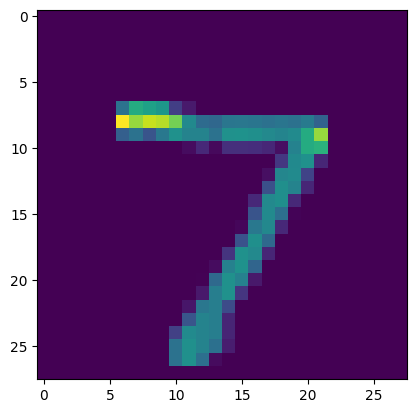

In [28]:
## checkking if our answer if true or not
plt.imshow(x_test[0])

In [31]:
# to confirm again, checking prediction for index 128
print(np.argmax(predictions[128]))

8


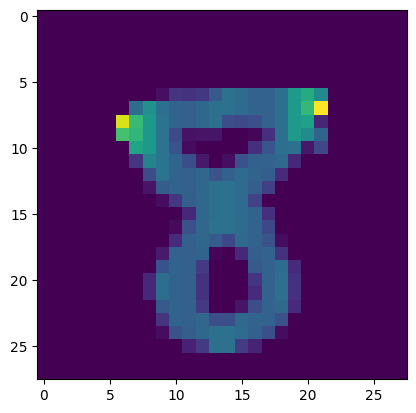

In [32]:
#checking the image of no to find if predictions is true or nor
plt.imshow(x_test[128])

In [33]:
import cv2

In [128]:
img = cv2.imread('sample_image1.png')     # loading image we have drawn in paint

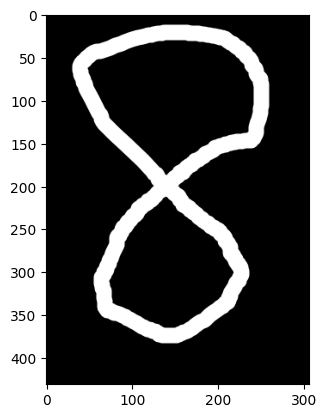

In [129]:
plt.imshow(img)

In [130]:
img.shape      #the 3 at lat shw image is in R G B

(431, 307, 3)

In [131]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)   #converting  image into grayscale

In [132]:
gray.shape     #gray is image changes in black and white, as you see from size the image change from R G B to plain

(431, 307)

In [133]:
resized = cv2.resize(gray,(28,28) , interpolation = cv2.INTER_AREA)   # after changinh into grayscale, changin the shape to match of train data

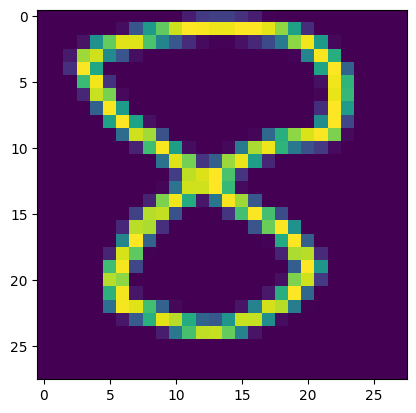

In [134]:
plt.imshow(resized)

In [135]:
# Normalizing the image to get its scale value between 0 to 1
newing = tf.keras.utils.normalize(resized, axis=1)

In [136]:
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE,1)  # kernel operation of convolution layer

In [137]:
newing.shape   # making it suitable for input into a CNN.

(1, 28, 28, 1)

In [138]:
predictions = model.predict(newing)   #here 'model' is your trained model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [139]:
print(np.argmax(predictions))

8
